<a href="https://colab.research.google.com/github/Jacklinekiarie/Tomatoes-disease-detection/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot  as plt
from matplotlib.pyplot import*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_height, img_width=[200,200]
batch_size= 32
train_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/train',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)
test_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/test',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)

val_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/validation',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)


Found 16666 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.
Found 330 files belonging to 10 classes.


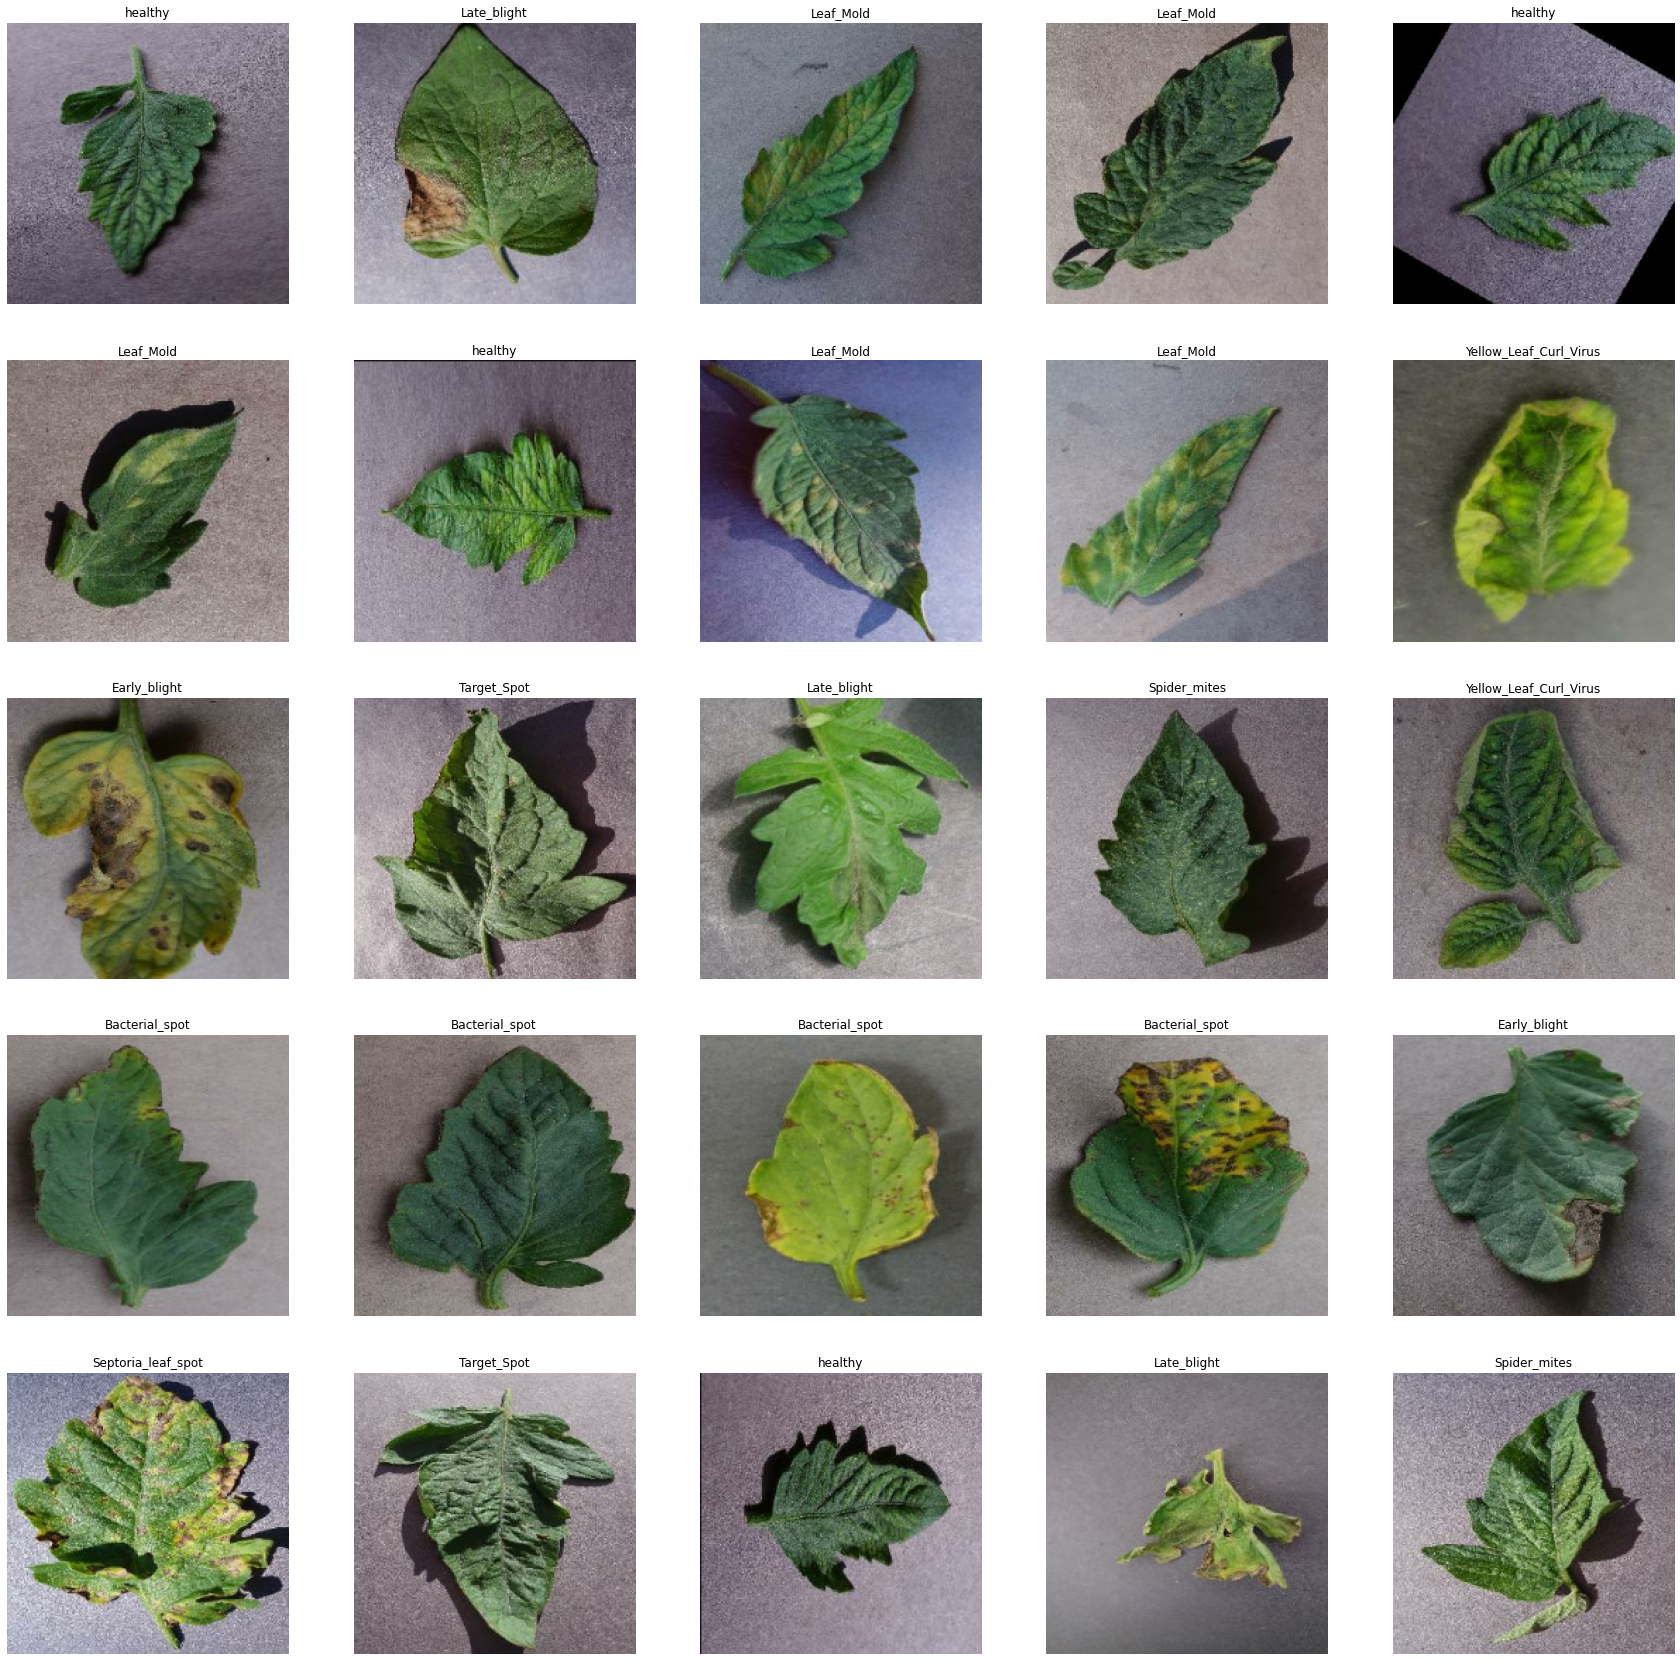

In [ ]:
class_names=["Bacterial_spot",
"Early_blight",
"Late_blight",
"Leaf_Mold",
"Septoria_leaf_spot",
"Spider_mites",
"Target_Spot",
"Yellow_Leaf_Curl_Virus",
"Tomato_mosaic_virus",
"healthy"]


plt.figure(figsize=(30,30))

for images, labels in train_ds.take(1):
  
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
import keras
from tensorflow.keras import utils as np_utils
from tensorflow.keras import datasets ,layers ,models
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.layers import Flatten
model = Sequential([
            
    Conv2D(filters=32,kernel_size=(3,3),  input_shape = (200, 200, 3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(101, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

In [ ]:
model.compile(
    optimizer="adam",
    loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_ds,validation_data=val_ds, epochs=10,callbacks=[callback])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


521/521 [==============================] - 2544s 5s/step - loss: 4.8744 - accuracy: 0.3538 - val_loss: 1.3019 - val_accuracy: 0.5848
Epoch 2/10
521/521 [==============================] - 867s 2s/step - loss: 1.1879 - accuracy: 0.5963 - val_loss: 0.9625 - val_accuracy: 0.6970
Epoch 3/10
521/521 [==============================] - 853s 2s/step - loss: 0.9258 - accuracy: 0.6808 - val_loss: 0.9248 - val_accuracy: 0.6879
Epoch 4/10
521/521 [==============================] - 6076s 12s/step - loss: 0.7779 - accuracy: 0.7302 - val_loss: 0.9457 - val_accuracy: 0.6606
Epoch 5/10
521/521 [==============================] - 848s 2s/step - loss: 0.6877 - accuracy: 0.7613 - val_loss: 0.8454 - val_accuracy: 0.6970
Epoch 6/10
521/521 [==============================] - 837s 2s/step - loss: 0.5922 - accuracy: 0.7932 - val_loss: 0.7770 - val_accuracy: 0.7364
Epoch 7/10
521/521 [==============================] - 839s 2s/step - loss: 0.5443 - accuracy: 0.8099 - val_loss: 0.5870 - val_accuracy: 0.7970
Epoch 8

In [ ]:
model.evaluate(test_ds)

144/144 [==============================] - 86s 593ms/step - loss: 0.4886 - accuracy: 0.8286


[0.4885956346988678, 0.8285714387893677]

144/144 - 70s - loss: 0.4886 - accuracy: 0.8286 - 70s/epoch - 488ms/step


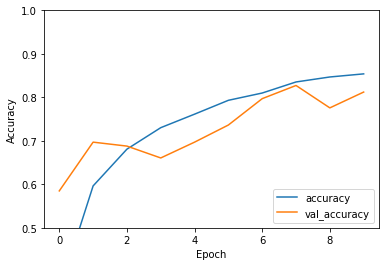

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

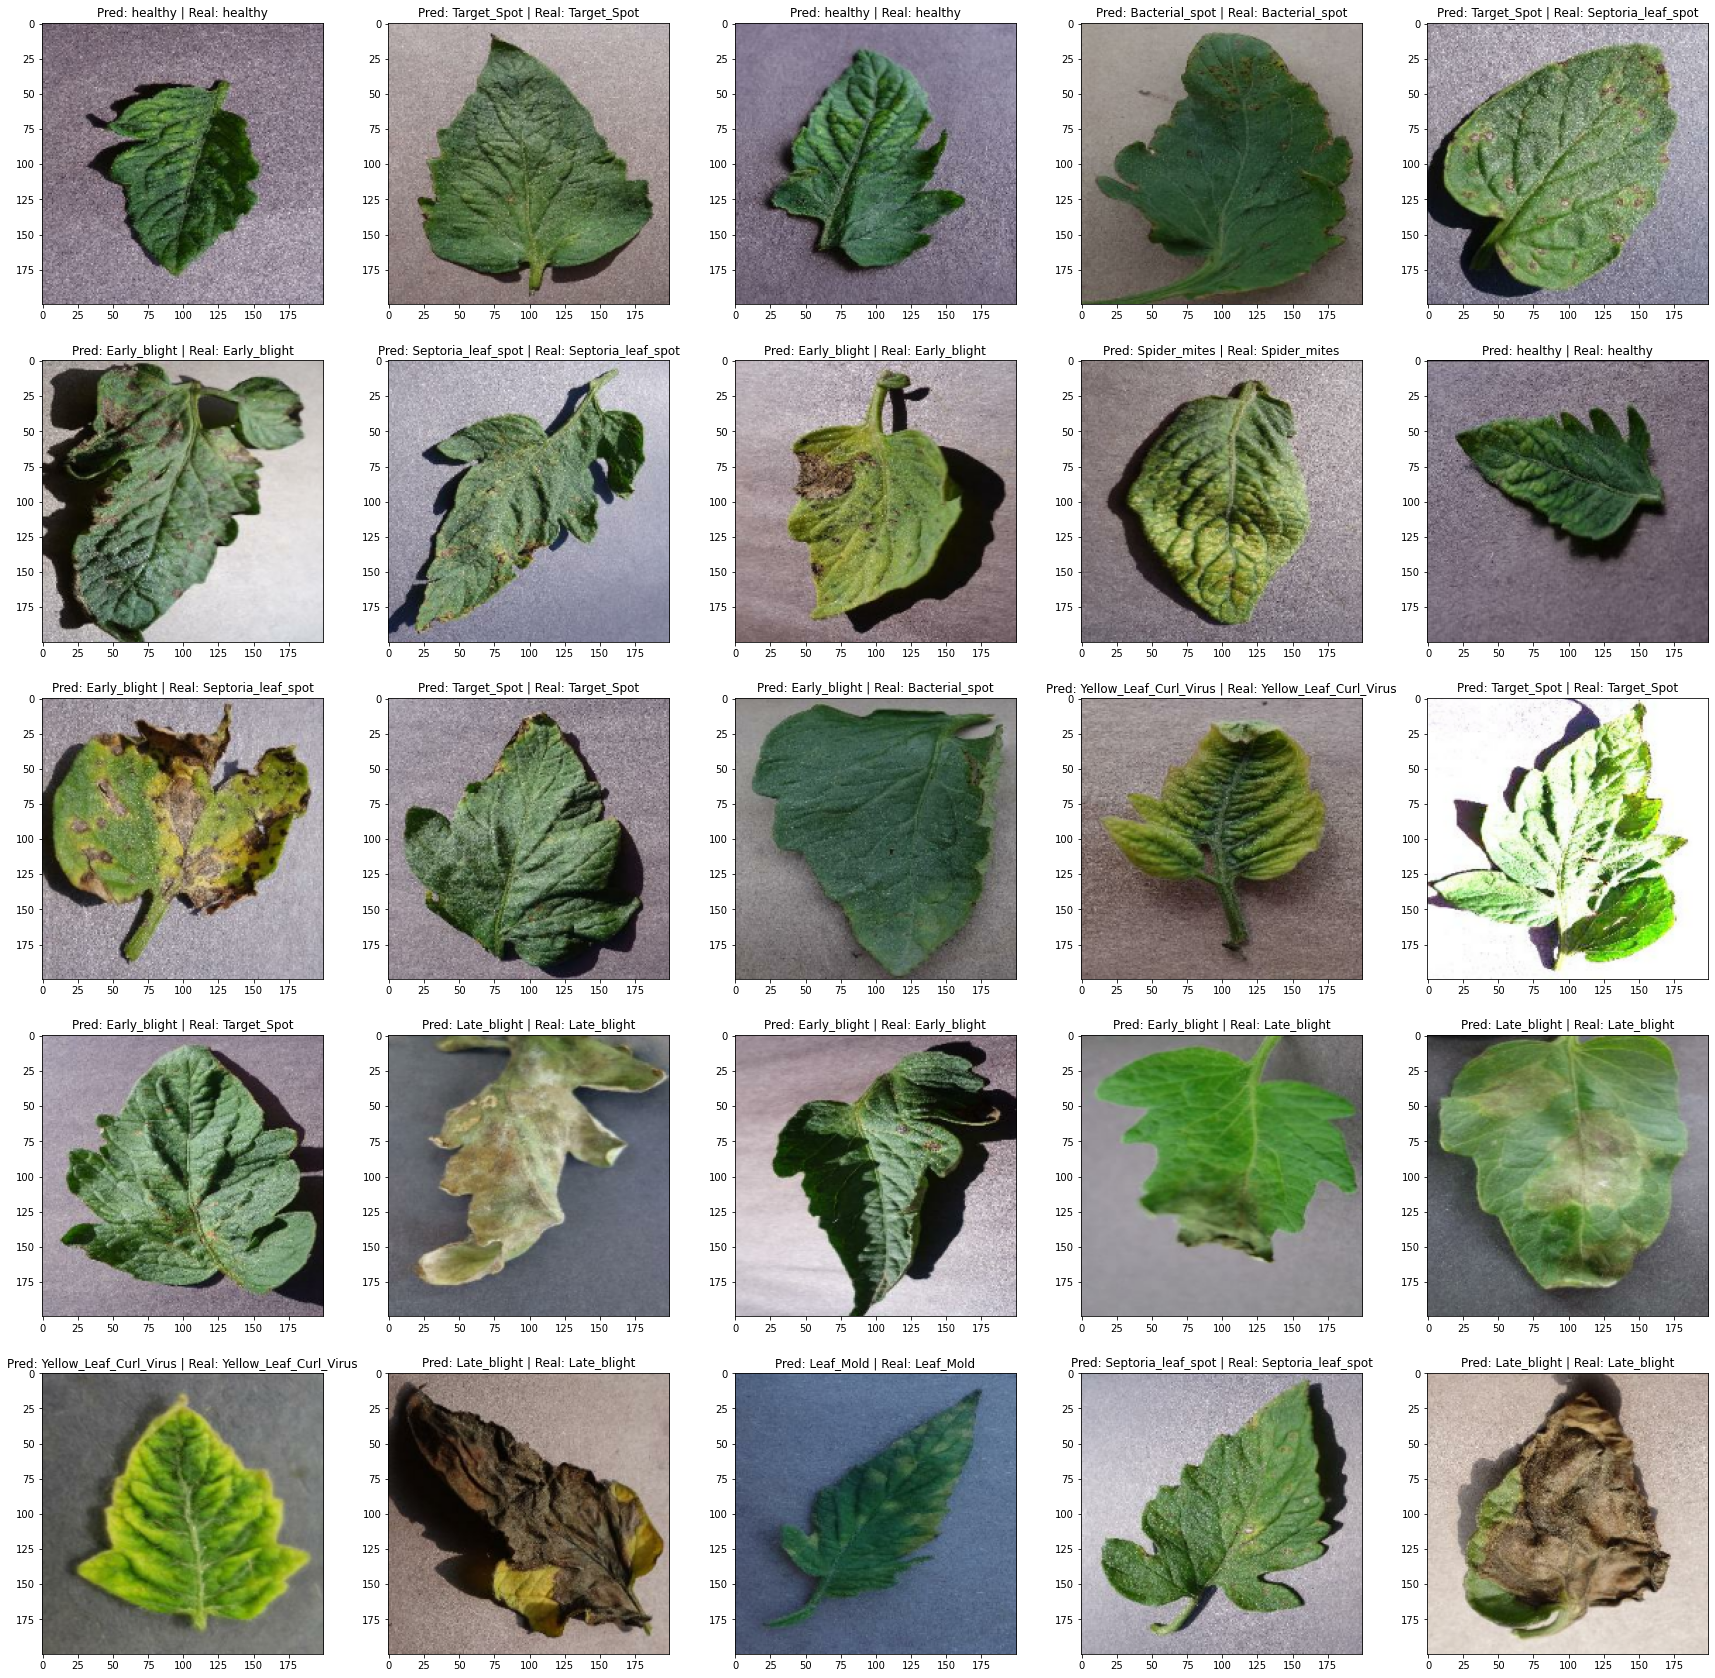

In [ ]:
import numpy

plt.figure(figsize=(30,30))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)